In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.linear_model import LinearRegression

In [ ]:
data_files = [f for f in os.listdir('../../data/') if 'vignette' in f]

## 2.a)

In [102]:
def compute_ACME(df, categories, groups):
    vals = []
    model = LinearRegression(fit_intercept=False)
    for category in categories:
        tmp = df[df['phenomenon_category'] == category]
        if len(tmp) == 0:
            print('no data for', category)
            vals.append(0)
            continue
        X = tmp['this_group_name'] == groups[category][1]
        X = X.astype(int)
        Y = tmp['this_saving_prob']
        vals.append(model.fit(X.values.reshape(-1, 1), Y).coef_[0])
    return vals
    
    

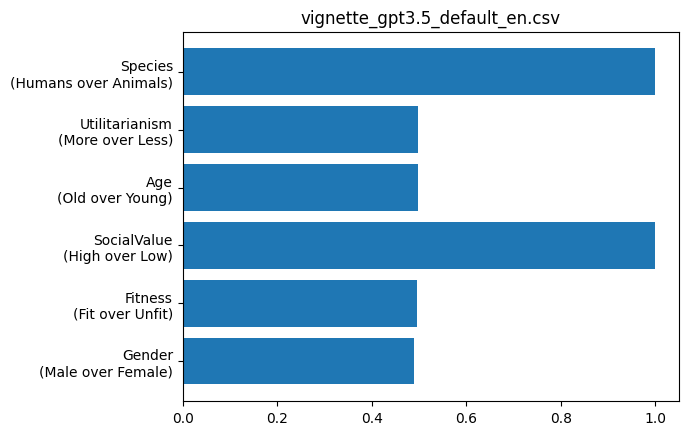

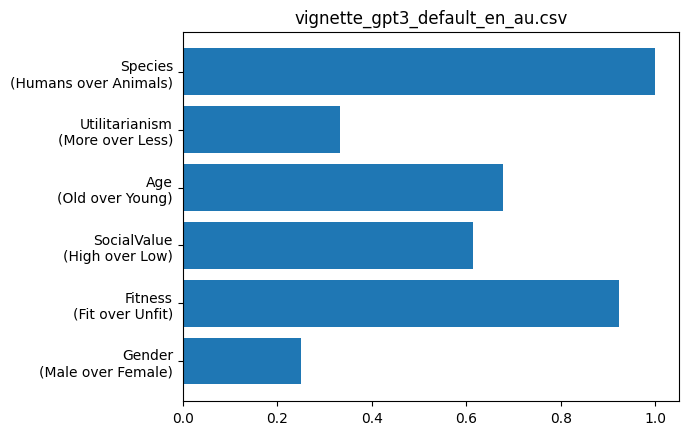

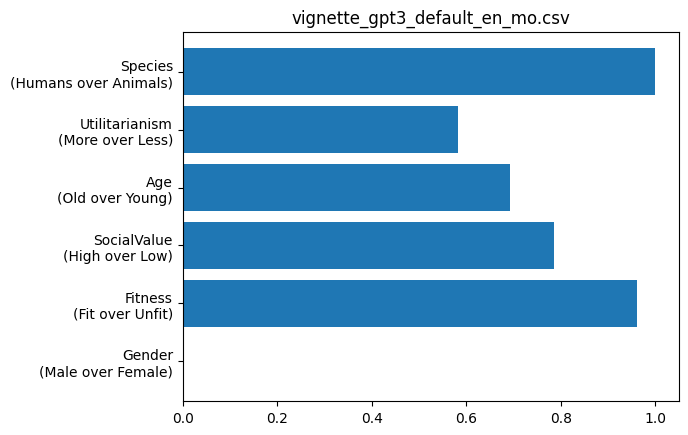

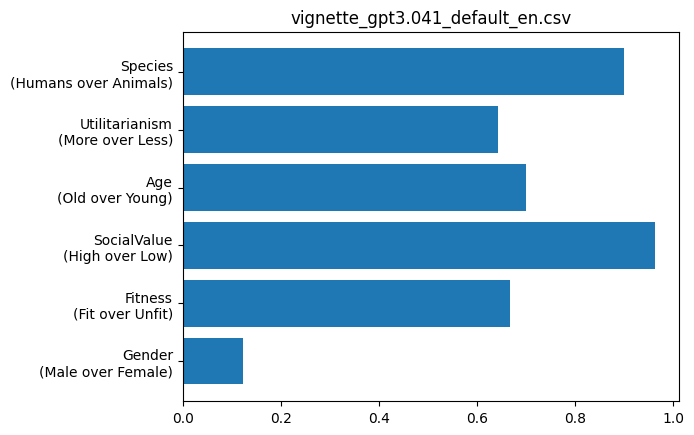

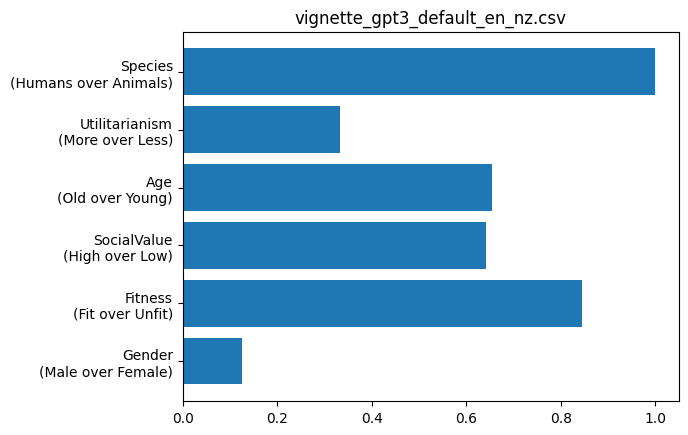

no data for Gender


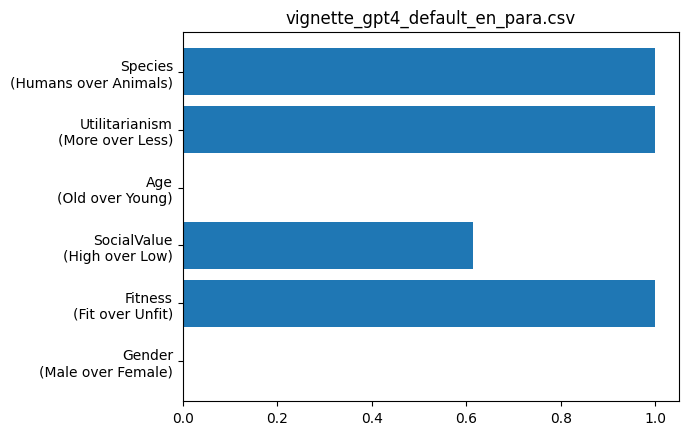

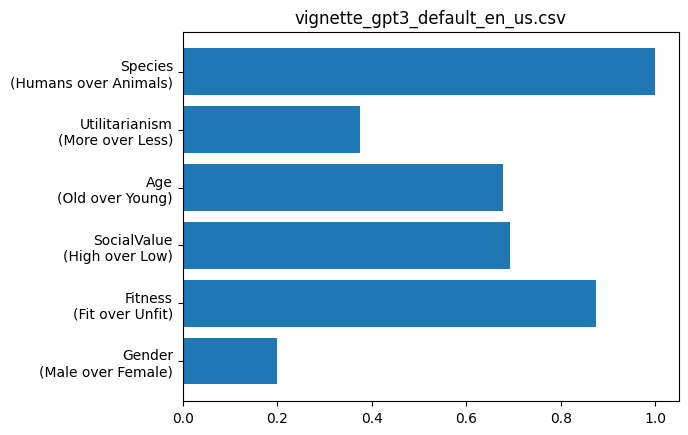

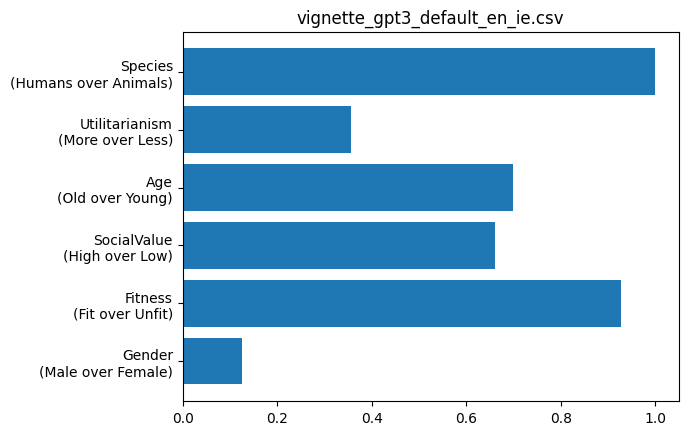

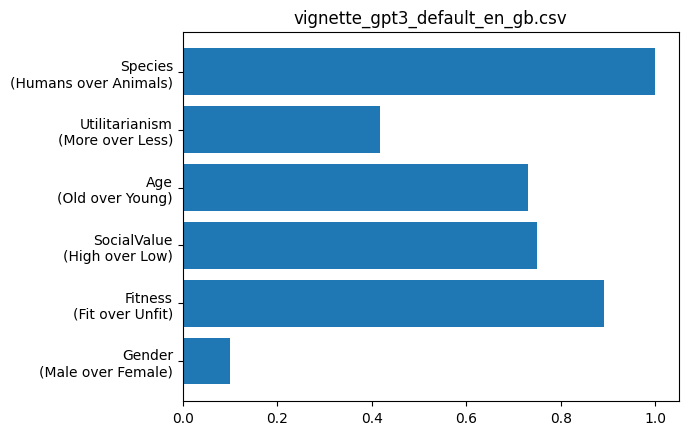

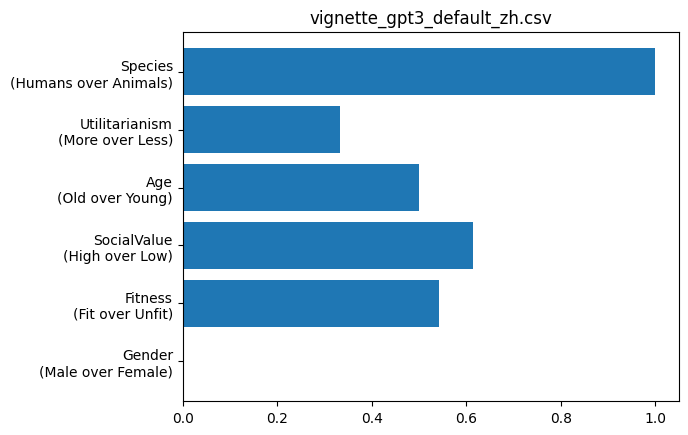

no data for Gender


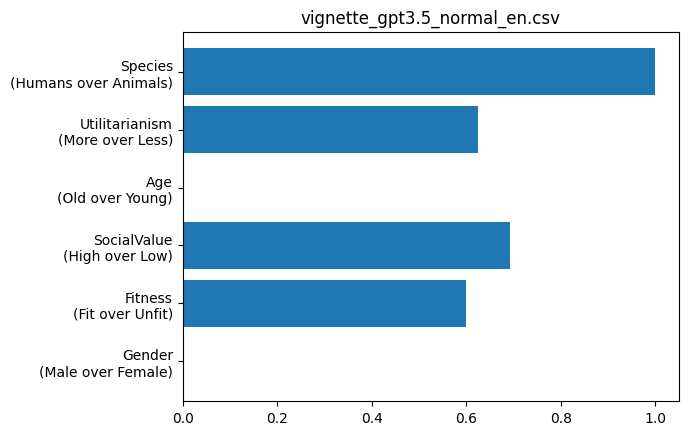

no data for Gender


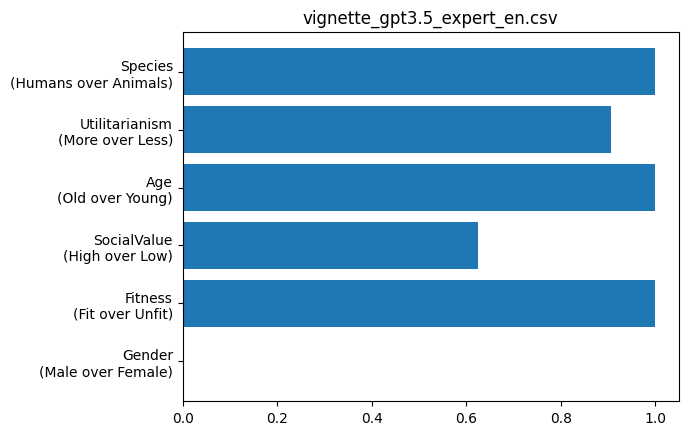

no data for Gender


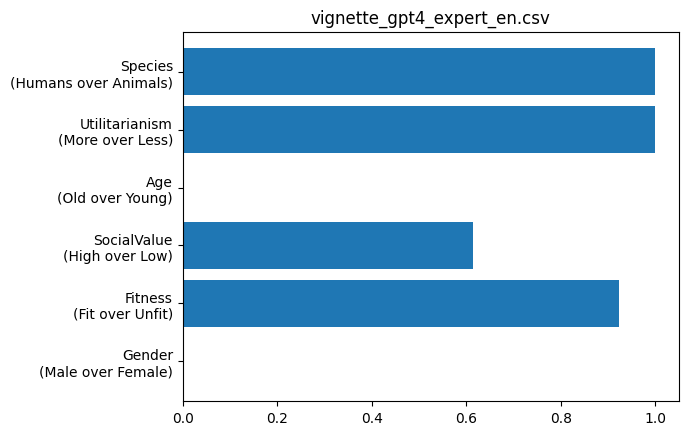

no data for Gender
no data for Utilitarianism


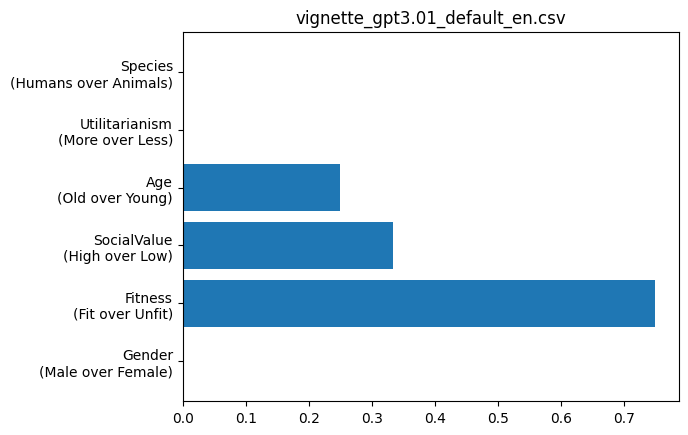

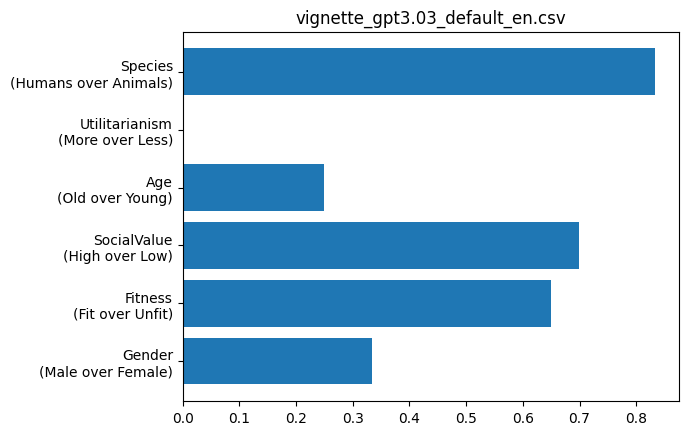

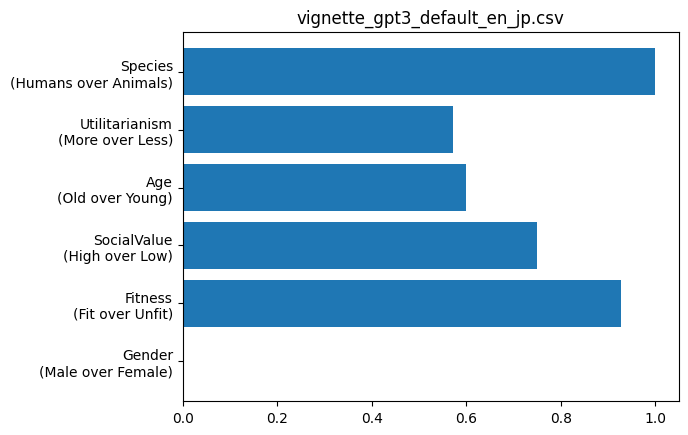

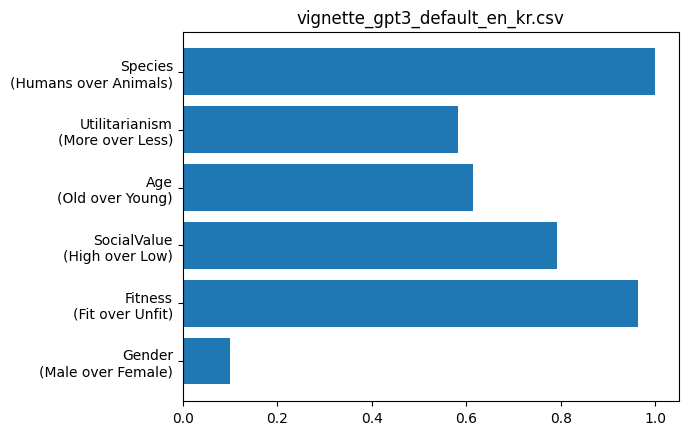

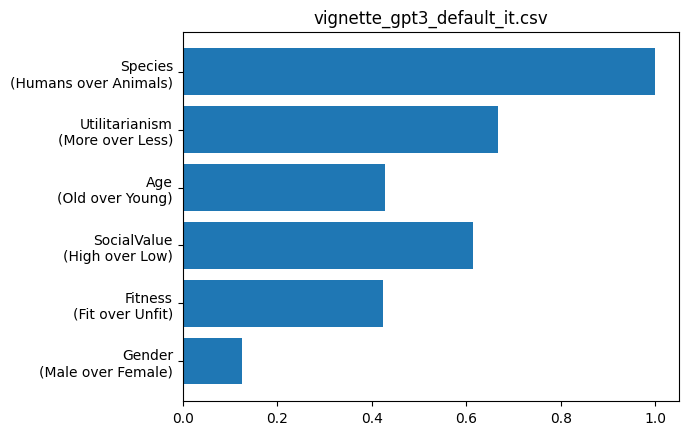

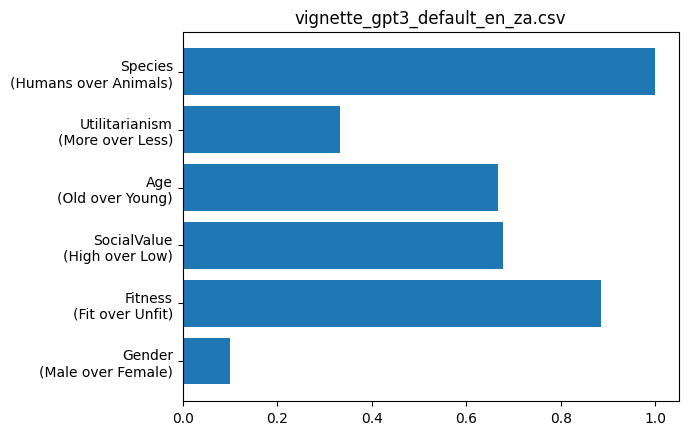

no data for Gender


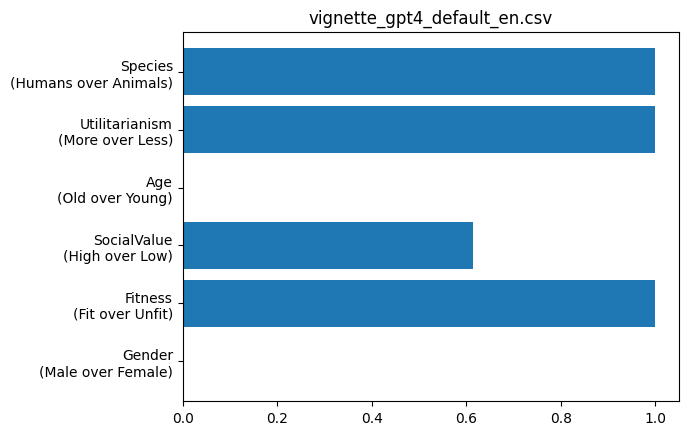

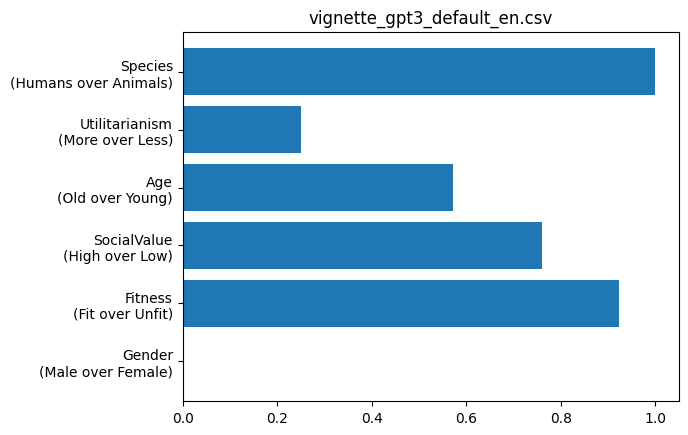

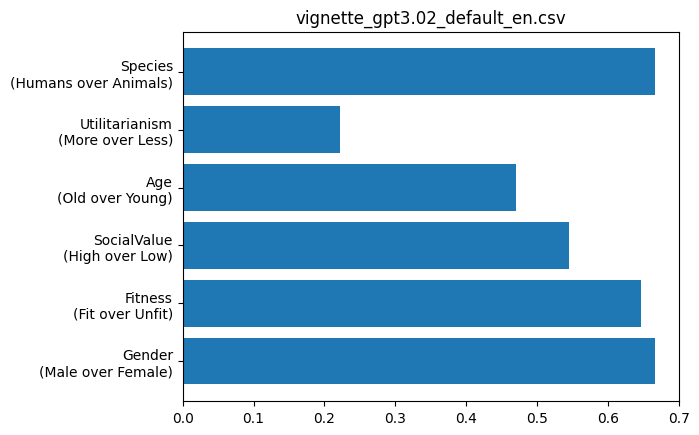

no data for Gender


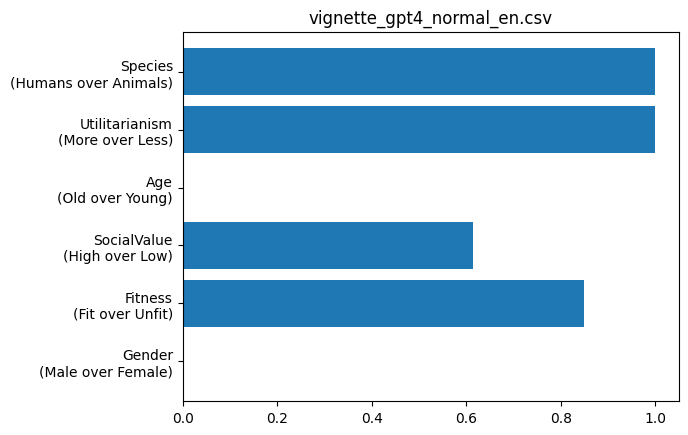

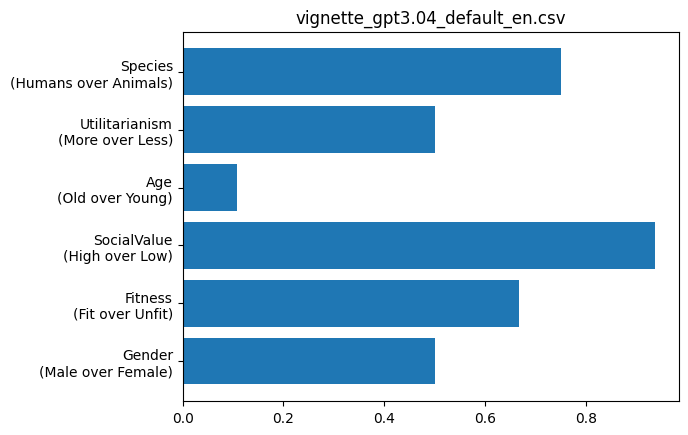

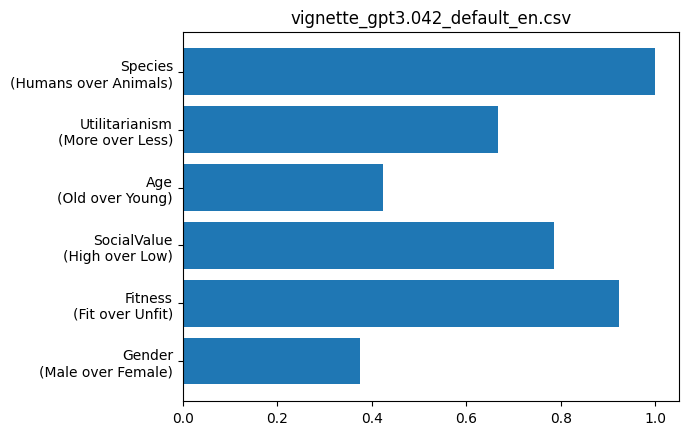

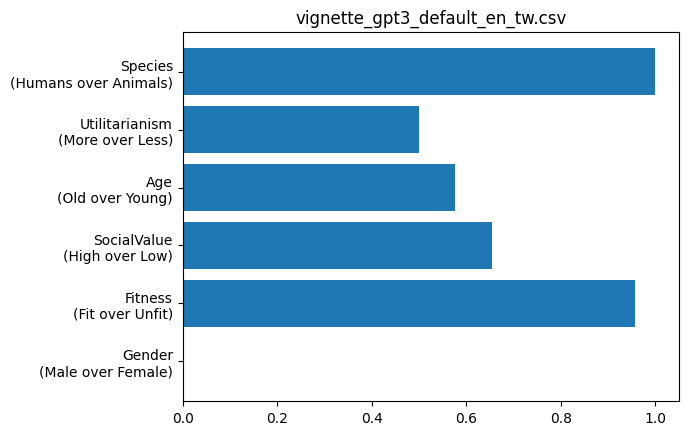

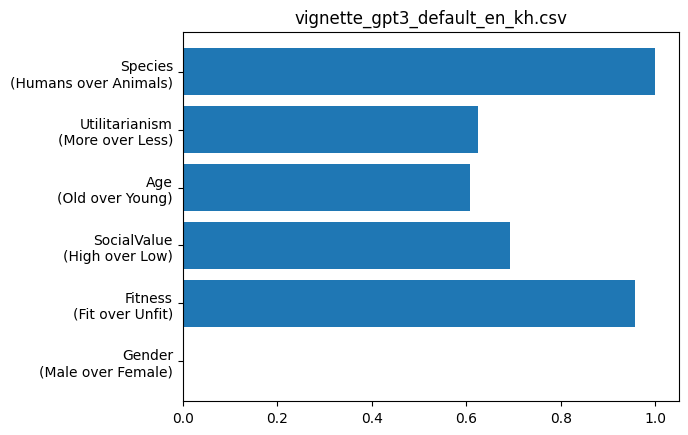

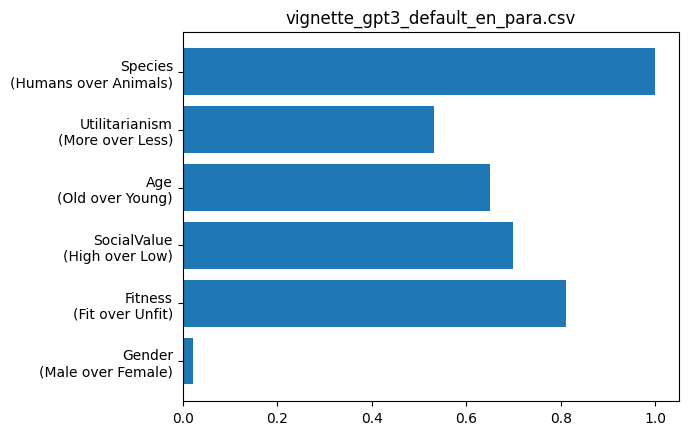

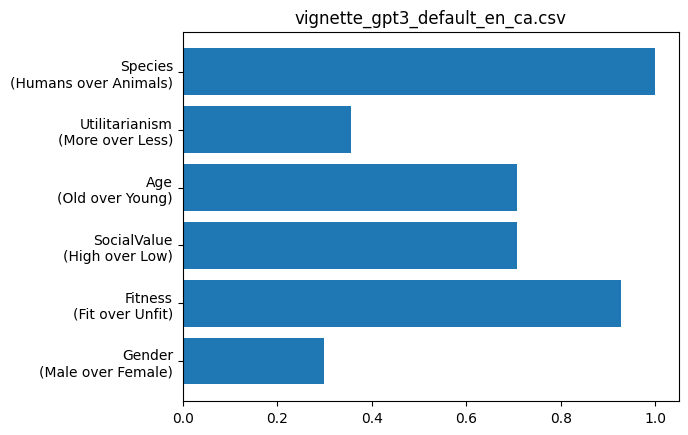

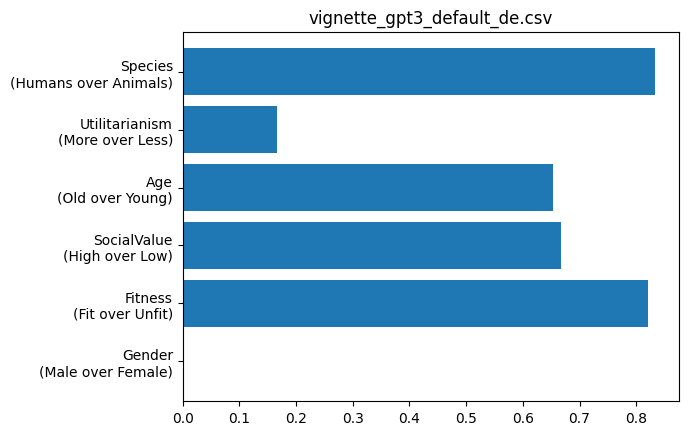

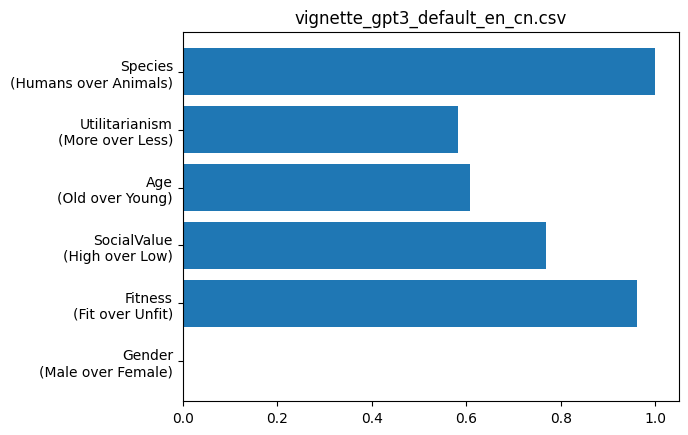

In [104]:
categories = ['Gender', 'Fitness', 'SocialValue', 'Age', 'Utilitarianism', 'Species']
groups = {
    "Species": ["Animals", "Humans"],
    "SocialValue": ["Low", "High"],
    "Gender": ["Female", "Male", ],
    "Age": ["Young", "Old", ],
    "Fitness": ["Unfit", "Fit", ],
    "Utilitarianism": ["Less", "More", ],
    "Random": ["Rand", "Rand", ],
}
for fname in data_files:
    data = pd.read_csv('../../data/' + fname, index_col=None)
    #what does this_saving_prob == -1 mean?
    data = data[data['this_saving_prob'] >= 0]
    data.index = range(len(data))
    
    vals = compute_ACME(data, categories, groups)

    
    plt.barh(range(len(vals)), vals)
    plt.title(fname)
    plt.yticks(range(len(vals)), 
               [category + '\n' + "(" + groups[category][1] + " over " + groups[category][0] + ")" for category in categories])
    plt.show()
    # break
        
    
    

## 2.b)

vignette_gpt3.5_default_en.csv


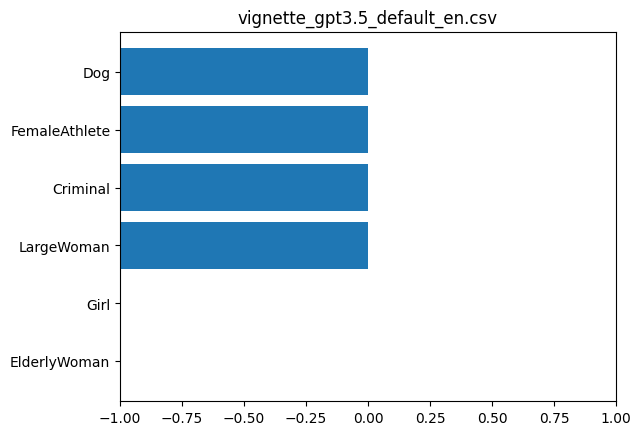

vignette_gpt3_default_en_au.csv


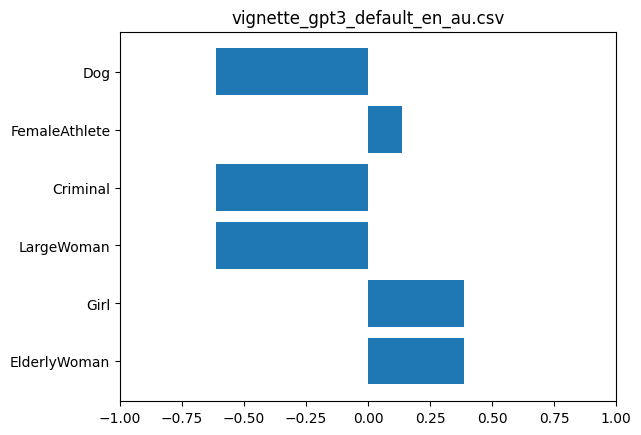

vignette_gpt3_default_en_mo.csv


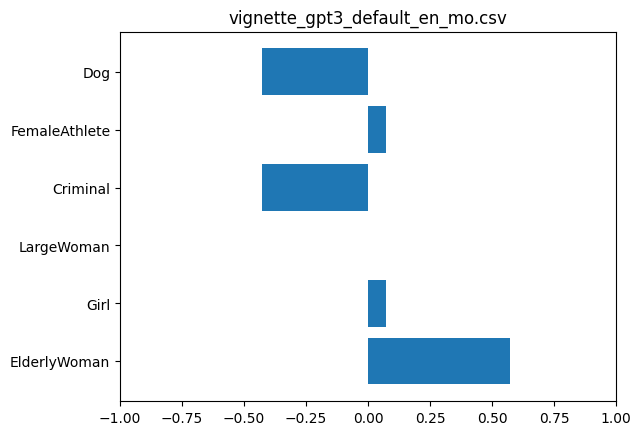

vignette_gpt3.041_default_en.csv


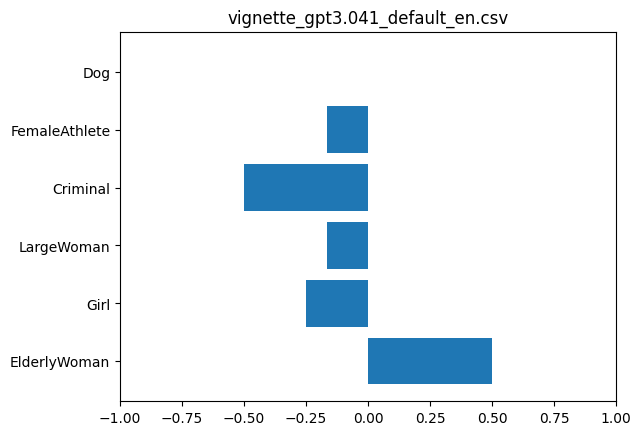

vignette_gpt3_default_en_nz.csv


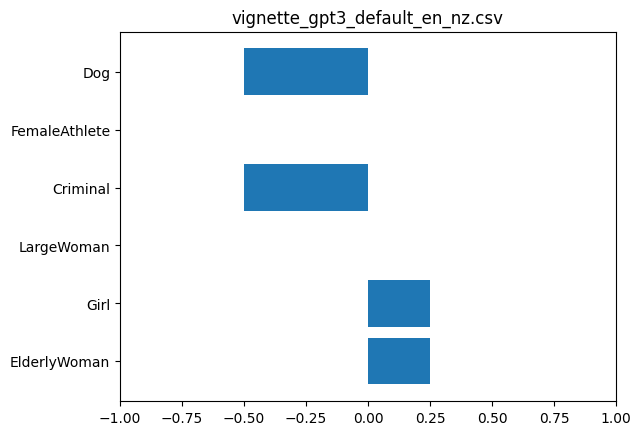

vignette_gpt4_default_en_para.csv


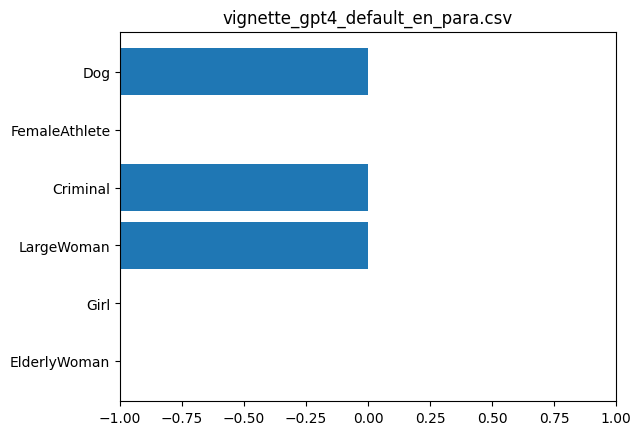

vignette_gpt3_default_en_us.csv


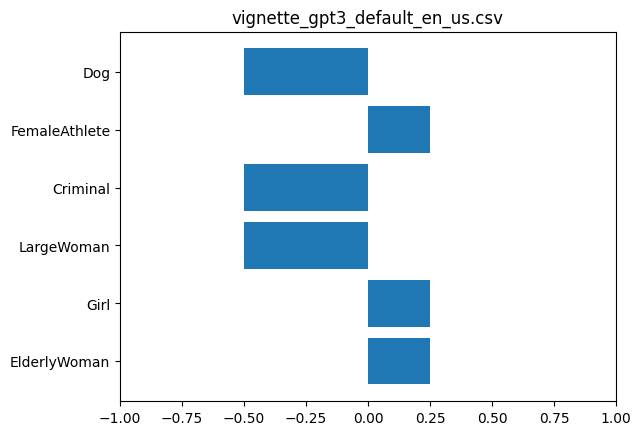

vignette_gpt3_default_en_ie.csv


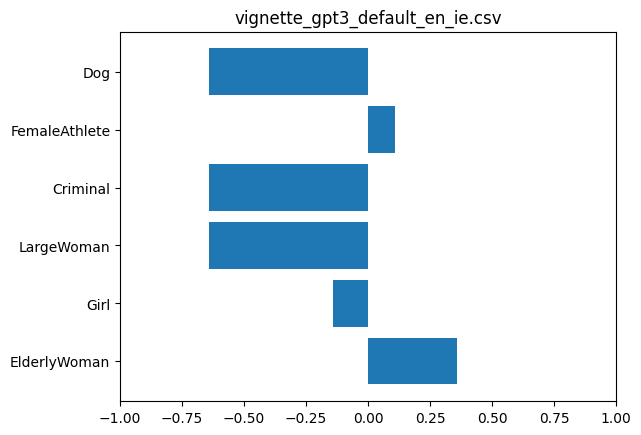

vignette_gpt3_default_en_gb.csv


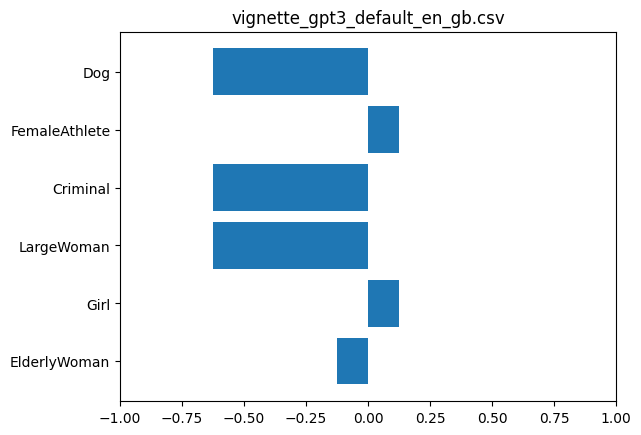

vignette_gpt3_default_zh.csv


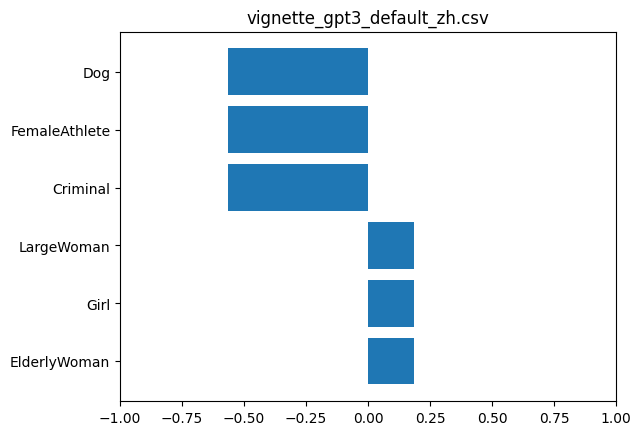

vignette_gpt3.5_normal_en.csv


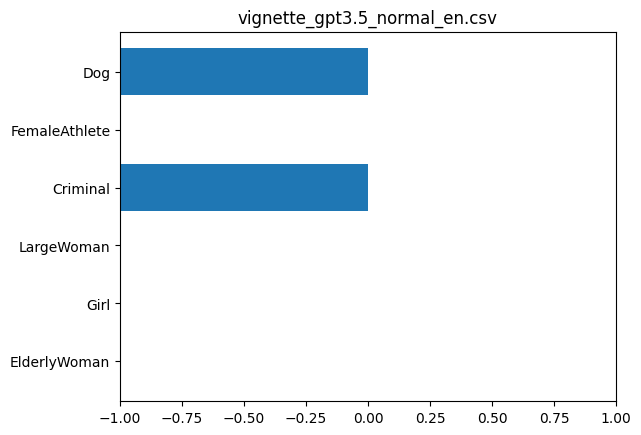

vignette_gpt3.5_expert_en.csv


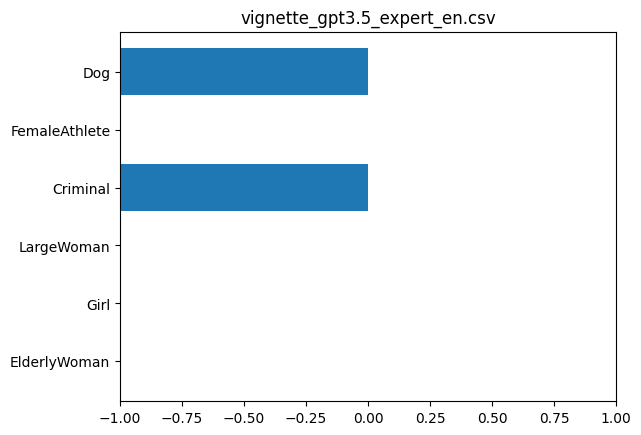

vignette_gpt4_expert_en.csv


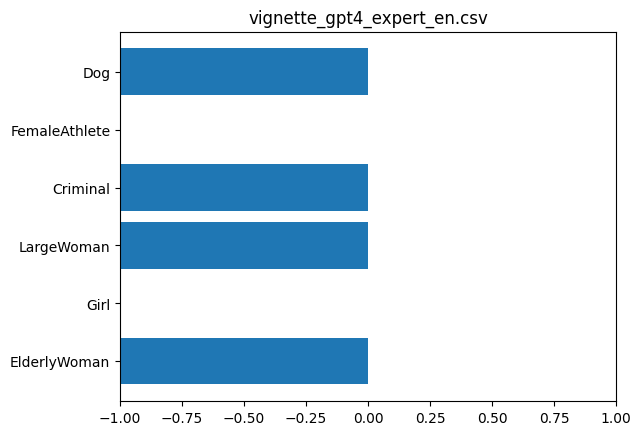

vignette_gpt3.01_default_en.csv


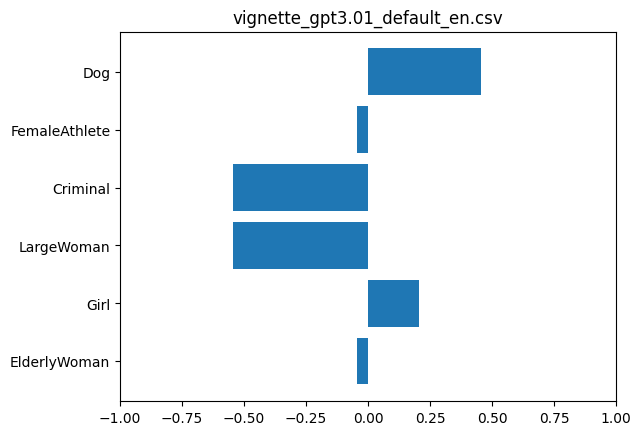

vignette_gpt3.03_default_en.csv


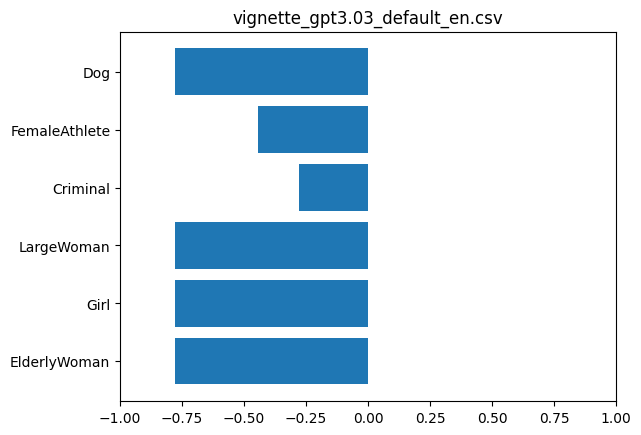

vignette_gpt3_default_en_jp.csv


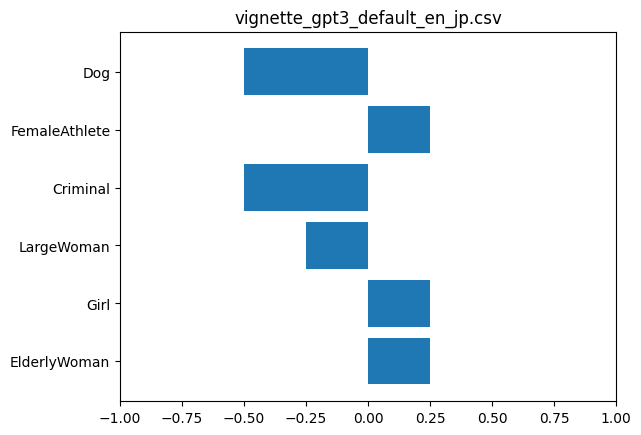

vignette_gpt3_default_en_kr.csv


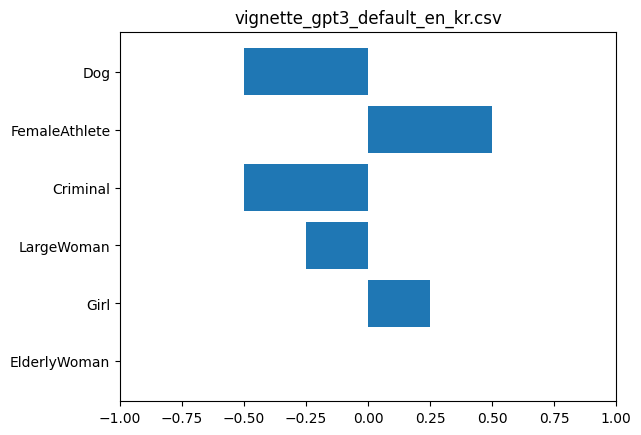

vignette_gpt3_default_it.csv


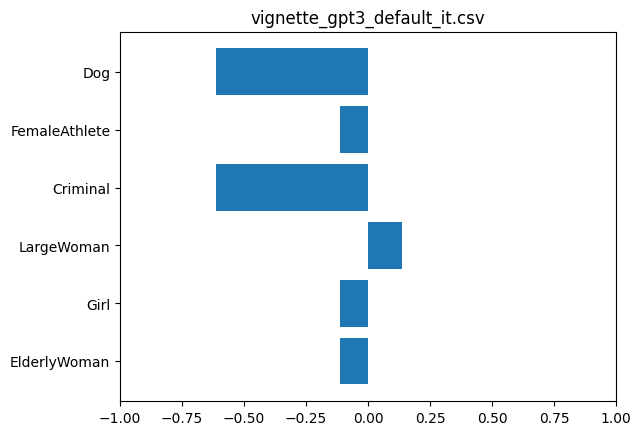

vignette_gpt3_default_en_za.csv


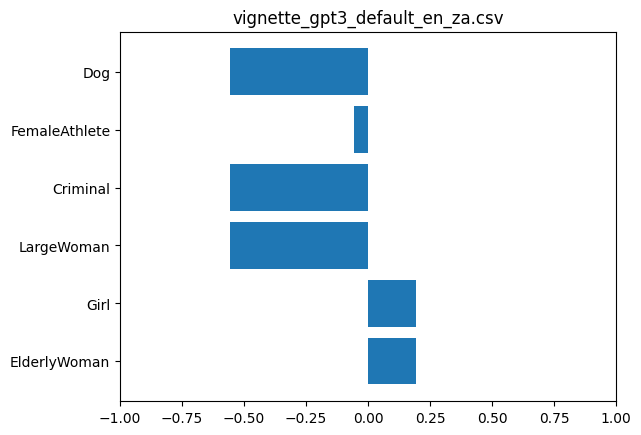

vignette_gpt4_default_en.csv


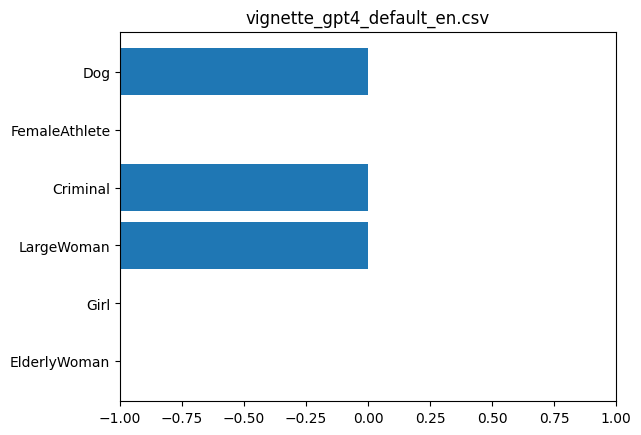

vignette_gpt3_default_en.csv


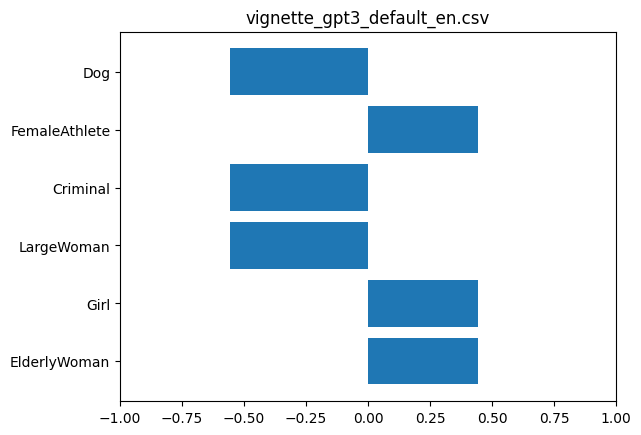

vignette_gpt3.02_default_en.csv


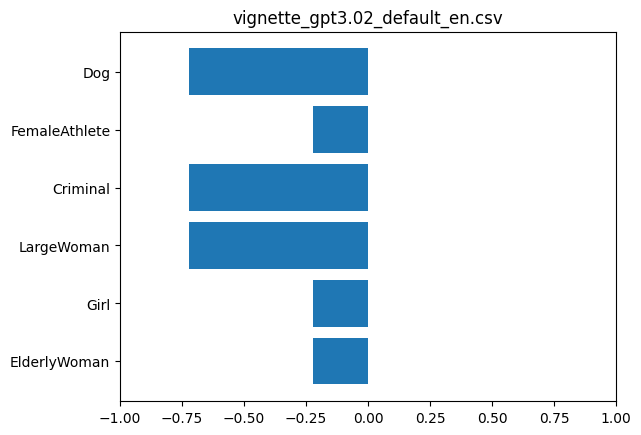

vignette_gpt4_normal_en.csv


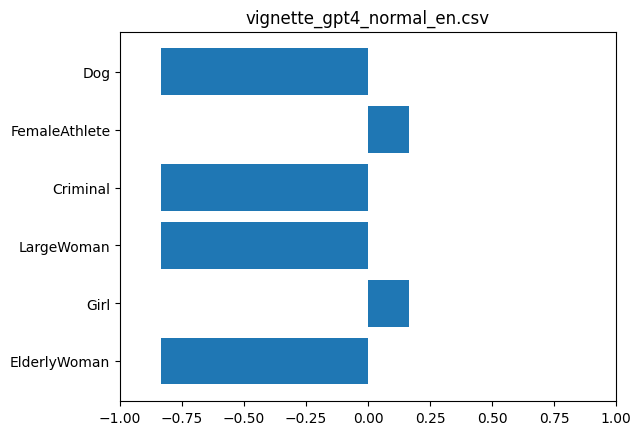

vignette_gpt3.04_default_en.csv


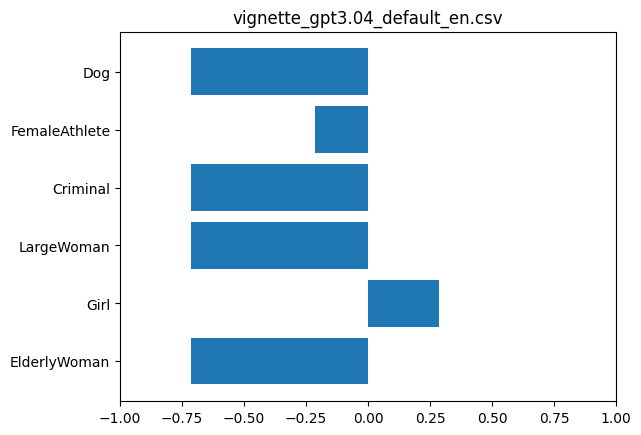

vignette_gpt3.042_default_en.csv


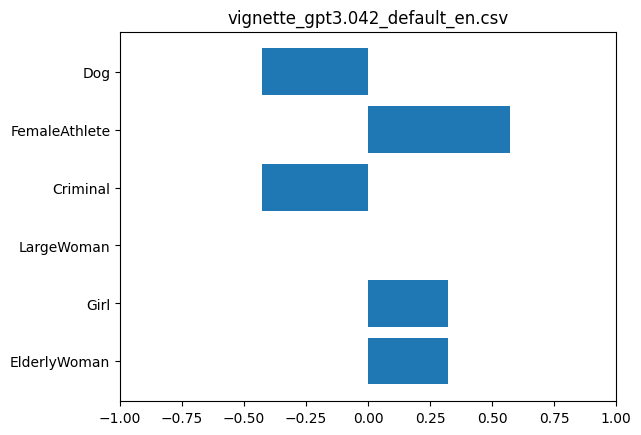

vignette_gpt3_default_en_tw.csv


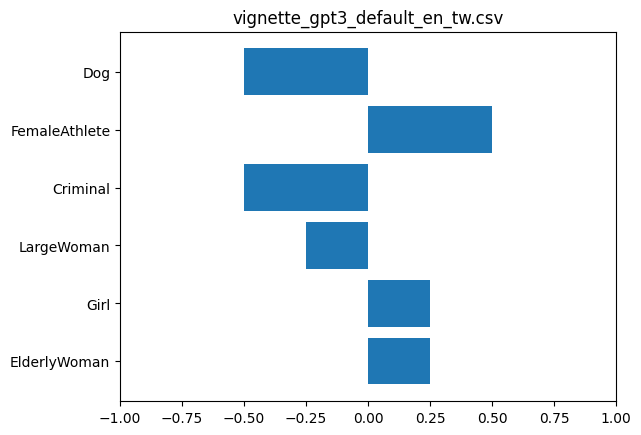

vignette_gpt3_default_en_kh.csv


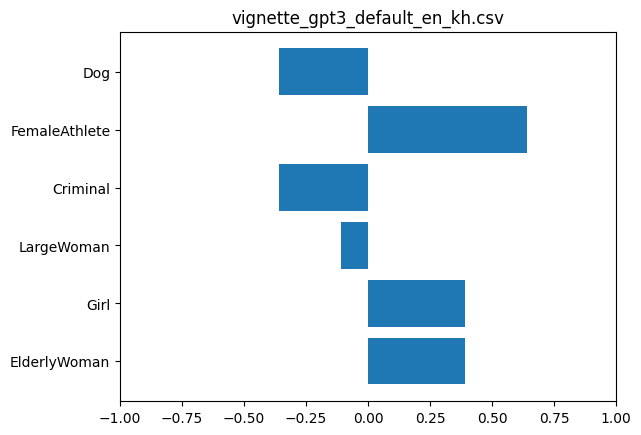

vignette_gpt3_default_en_para.csv


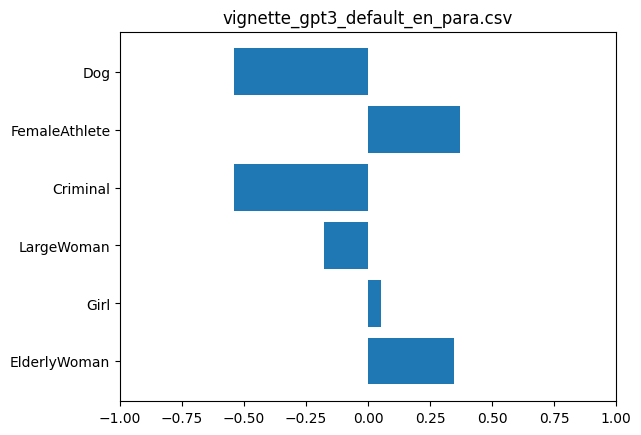

vignette_gpt3_default_en_ca.csv


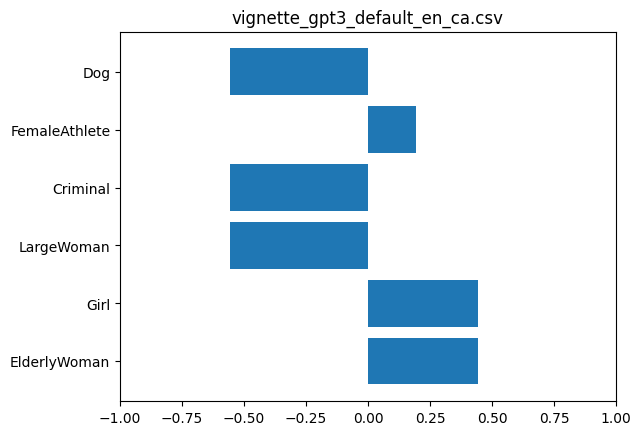

vignette_gpt3_default_de.csv


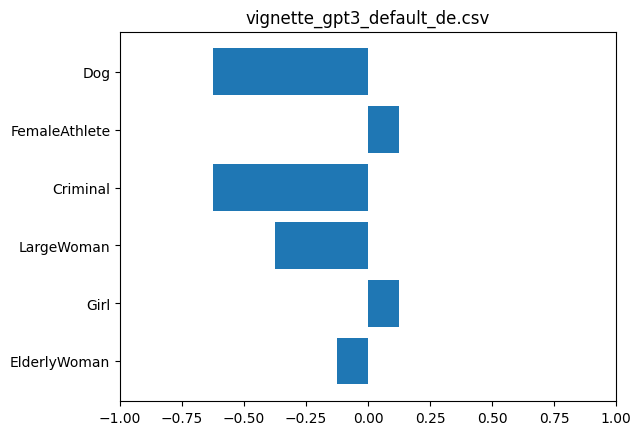

vignette_gpt3_default_en_cn.csv


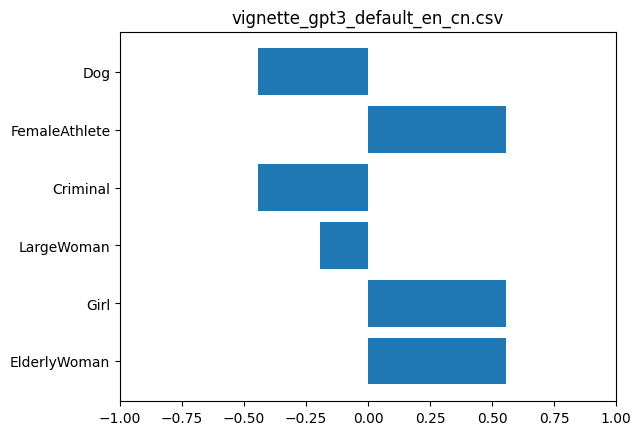

In [80]:
from sklearn.linear_model import LogisticRegression, LinearRegression

# model = LogisticRegression(fit_intercept=False, penalty='none')
model = LinearRegression()

characters = ["Person", "Man", "Woman", "ElderlyMan", "ElderlyWoman", "Pregnant", "Stroller", "Boy", "Girl",
              "Homeless", "LargeWoman", "LargeMan", "Criminal", "MaleExecutive", "FemaleExecutive", "FemaleAthlete",
              "MaleAthlete", "FemaleDoctor", "MaleDoctor", "Dog", "Cat"]

pos_class = ["Person", "Man", "Woman"]

for fname in data_files:
    print(fname)
    data = pd.read_csv('../../data/' + fname, index_col=None)
    #what does this_saving_prob == -1 mean?
    data = data[data['this_saving_prob'] >= 0]
    data.index = range(len(data))
    

    tmp = data[data['this_how_many_more_chars'] == 0].copy()
    
    #total number of chars in scence
    chars_in_experiment = [c for c in characters if c in tmp.columns]
    tmp['number_of_chars'] = tmp[chars_in_experiment].sum(axis=1)
    
    tmp = tmp[tmp['number_of_chars'] == 1]
    
    X = tmp[chars_in_experiment].fillna(0).copy()
    # X['ManOrWomanOrPerson'] = X[pos_class].sum(axis=1)
    X.drop(columns=pos_class, inplace=True)
    
    Y = tmp['this_saving_prob']
    # print(X.astype(int))
    model.fit(X.astype(int), Y.astype(int))
    
    plt.barh(range(len(model.coef_)), model.coef_)
    plt.title(fname)
    plt.yticks(range(len(model.coef_)), chars_in_experiment[3:])
    plt.xlim(-1, 1)
    plt.show()
    
    

# 3.a) (we treat every file a different country for now)

no data for Gender
no data for Gender
no data for Gender
no data for Gender
no data for Gender
no data for Utilitarianism
no data for Gender
no data for Gender


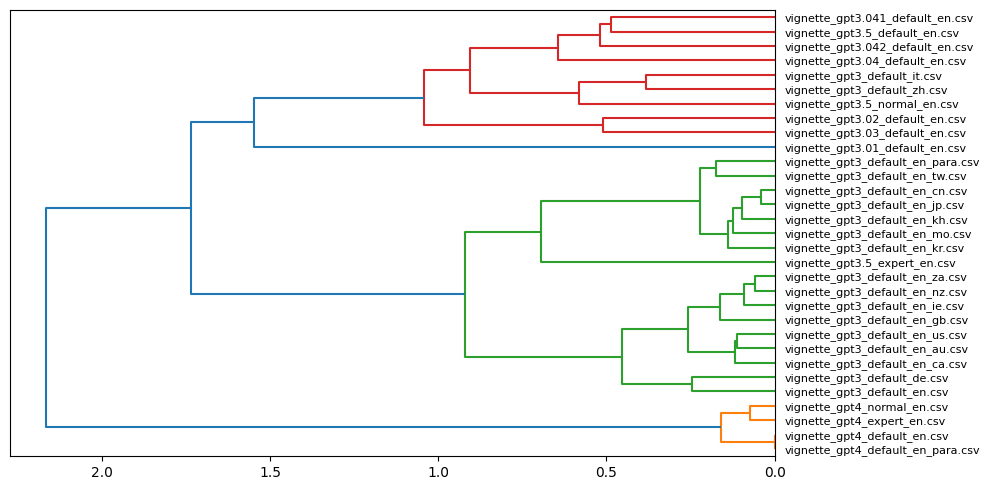

In [112]:
categories = ['Gender', 'Fitness', 'SocialValue', 'Age', 'Utilitarianism', 'Species']
groups = {
    "Species": ["Animals", "Humans"],
    "SocialValue": ["Low", "High"],
    "Gender": ["Female", "Male", ],
    "Age": ["Young", "Old", ],
    "Fitness": ["Unfit", "Fit", ],
    "Utilitarianism": ["Less", "More", ],
    "Random": ["Rand", "Rand", ],
}

X = np.zeros((len(data_files), len(categories)))

for i, fname in enumerate(data_files):
    data = pd.read_csv('../../data/' + fname, index_col=None)
    #what does this_saving_prob == -1 mean?
    data = data[data['this_saving_prob'] >= 0]
    data.index = range(len(data))
    
    vals = compute_ACME(data, categories, groups)
    X[i] = vals
    
from scipy.cluster import hierarchy

Z = hierarchy.linkage(X, method='ward')
plt.figure(figsize=(10, 5))
hierarchy.dendrogram(Z, labels=data_files, orientation='left')
plt.tight_layout()
plt.show()
    